#  Multilayer Perceptron trong Python

In [166]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import numpy as np
from sklearn.neural_network import MLPClassifier

## 1) MLPClassifier for toy dataset 

### Chuẩn bị dữ liệu

In [167]:
# Create artificial dataset (classification problem within 2 classes within R^2 input space)
X, y = make_moons(n_samples=900, noise=0.2, random_state=0)

In [168]:
X = np.array(X)
y = np.array(y)

In [169]:
X.shape

(900, 2)

In [170]:
y.shape

(900,)

In [171]:
# Preprocess dataset, and split into training and test part
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [172]:
# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Y_train_OneHot = np.eye(2)[y_train]
Y_test_OneHot = np.eye(2)[y_test]

In [173]:
X_train.shape

(270, 2)

In [174]:
y_train.shape

(270,)

In [175]:
# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

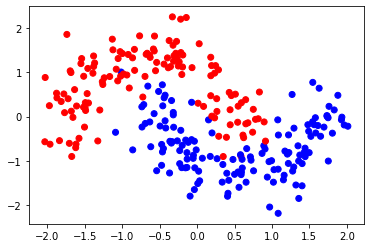

In [176]:
# Plot the training points...
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)

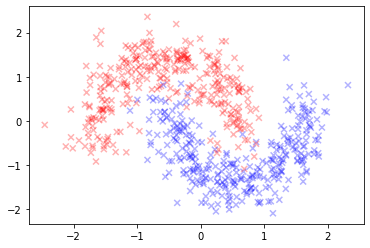

In [177]:
#   ...and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)


### Xây dựng model `MLPClassifier`

In [178]:


clf = MLPClassifier(hidden_layer_sizes=(1, ), activation='tanh', solver='sgd', 
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.005, 
                    power_t=0.5, max_iter=500, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1,), learning_rate='constant',
              learning_rate_init=0.005, max_fun=15000, max_iter=500,
              momentum=0.8, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.2, verbose=True,
              warm_start=False)


In [179]:

# Train the MLP classifier on training dataset
clf.fit(X_train, Y_train_OneHot)
print()


Iteration 1, loss = 1.65540492
Iteration 2, loss = 1.49505759
Iteration 3, loss = 1.42788840
Iteration 4, loss = 1.39459811
Iteration 5, loss = 1.36741114
Iteration 6, loss = 1.33003093
Iteration 7, loss = 1.27001111
Iteration 8, loss = 1.18394575
Iteration 9, loss = 1.07129327
Iteration 10, loss = 0.96332157
Iteration 11, loss = 0.88294815
Iteration 12, loss = 0.83192586
Iteration 13, loss = 0.80045554
Iteration 14, loss = 0.78157006
Iteration 15, loss = 0.76947400
Iteration 16, loss = 0.76200980
Iteration 17, loss = 0.75492107
Iteration 18, loss = 0.74984326
Iteration 19, loss = 0.74577707
Iteration 20, loss = 0.74140410
Iteration 21, loss = 0.74067697
Iteration 22, loss = 0.73540368
Iteration 23, loss = 0.73292225
Iteration 24, loss = 0.73254276
Iteration 25, loss = 0.72850372
Iteration 26, loss = 0.72824871
Iteration 27, loss = 0.72391217
Iteration 28, loss = 0.72315600
Iteration 29, loss = 0.72287937
Iteration 30, loss = 0.71983797
Iteration 31, loss = 0.71924654
Iteration 32, los

In [180]:

# Evaluate acuracy on test data
score = clf.score(X_test,Y_test_OneHot)
print("Acuracy (on test set) = ", score)

Acuracy (on test set) =  0.8841269841269841


### Sử dụng GridSearchCV để chọn bộ thông số tốt nhất 

In [181]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# param_grid = [
#   {'hidden_layer_sizes': [(5,), (10,), (15,), (25,)], 
#    'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
#    'alpha': [0.00001, 0.0001, 0.001, 0.01]}
#  ]

param_grid = [
  {'hidden_layer_sizes': [(5,), (10,)], 
   'learning_rate_init':[0.003, 0.01],
   'alpha': [0.00001, 0.0001]}
 ]


clf = GridSearchCV( MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
   beta_2=0.999, early_stopping=False, epsilon=1e-08,
   hidden_layer_sizes=(10,), learning_rate='constant',
   learning_rate_init=0.005, max_iter=500, momentum=0.8,
   nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
   solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
   warm_start=False), 
   param_grid, cv=3, scoring='accuracy')



In [182]:
clf.fit(X_train, Y_train_OneHot)
print("Best parameters set found on development set:")



C:\Users\Nhat Chung\.conda\envs\tf_gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nhat Chung\.conda\envs\tf_gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nhat Chung\.conda\envs\tf_gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nhat Chung\.conda\envs\tf_gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the op

Best parameters set found on development set:


In [183]:
print(clf.best_params_)


{'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01}


In [184]:
clf.best_estimator_

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=500,
              momentum=0.8, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='adam',
              tol=1e-05, validation_fraction=0.3, verbose=False,
              warm_start=False)

In [185]:
clf.best_score_

0.9592592592592593

## 2) MLPClassifier cho bộ dữ liệu số

Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE


<Figure size 432x288 with 0 Axes>

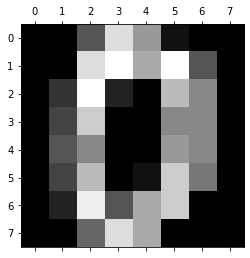

In [186]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
print("CLOSE PLOT WINDOW TO CONTINUE")
plt.ioff()

In [187]:

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

X = data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [188]:
X_train.shape

(1437, 64)

In [189]:
y_train.shape

(1437,)

In [190]:
clf = MLPClassifier(hidden_layer_sizes=(30, ), activation='tanh', solver='sgd', 
                    alpha=0.00001, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=500, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=True, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [191]:
clf

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=500,
              momentum=0.8, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [192]:
# Train the MLP classifier on training dataset
clf.fit(X_train, y_train)


Iteration 1, loss = 1.28868687
Validation score: 0.736111
Iteration 2, loss = 0.62678620
Validation score: 0.902778
Iteration 3, loss = 0.55092033
Validation score: 0.916667
Iteration 4, loss = 0.56807190
Validation score: 0.826389
Iteration 5, loss = 0.68731300
Validation score: 0.868056
Iteration 6, loss = 0.54749048
Validation score: 0.888889
Iteration 7, loss = 0.40109185
Validation score: 0.854167
Iteration 8, loss = 0.39744048
Validation score: 0.930556
Iteration 9, loss = 0.40696955
Validation score: 0.888889
Iteration 10, loss = 0.36714849
Validation score: 0.750000
Iteration 11, loss = 0.41239278
Validation score: 0.916667
Iteration 12, loss = 0.32260488
Validation score: 0.888889
Iteration 13, loss = 0.46433372
Validation score: 0.819444
Iteration 14, loss = 0.47686262
Validation score: 0.909722
Iteration 15, loss = 0.42631630
Validation score: 0.958333
Iteration 16, loss = 0.37562898
Validation score: 0.902778
Iteration 17, loss = 0.33155534
Validation score: 0.861111
Iterat

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=500,
              momentum=0.8, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [193]:

score = clf.score(X_train,y_train)
print("Acuracy (on train set) = ", score)

Acuracy (on train set) =  0.9213639526791928


In [194]:

score = clf.score(X_test,y_test)
print("Acuracy (on test set) = ", score)


Acuracy (on test set) =  0.875


### Thay đổi số layers, số neurons trên mỗi layers:

In [195]:
clf = MLPClassifier(hidden_layer_sizes=(30, 20, 15 ), activation='tanh', solver='sgd', 
                    alpha=0.00001, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=500, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=True, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [196]:
# Train the MLP classifier on training dataset
clf.fit(X_train, y_train)


Iteration 1, loss = 1.38822410
Validation score: 0.652778
Iteration 2, loss = 1.10681682
Validation score: 0.576389
Iteration 3, loss = 1.31162474
Validation score: 0.500000
Iteration 4, loss = 1.00682211
Validation score: 0.597222
Iteration 5, loss = 1.25635891
Validation score: 0.555556
Iteration 6, loss = 1.11226184
Validation score: 0.673611
Iteration 7, loss = 1.03527748
Validation score: 0.548611
Iteration 8, loss = 1.00297260
Validation score: 0.687500
Iteration 9, loss = 0.80971166
Validation score: 0.722222
Iteration 10, loss = 0.83009116
Validation score: 0.694444
Iteration 11, loss = 0.81868768
Validation score: 0.611111
Iteration 12, loss = 0.89350843
Validation score: 0.756944
Iteration 13, loss = 0.85970643
Validation score: 0.652778
Iteration 14, loss = 0.82672354
Validation score: 0.680556
Iteration 15, loss = 0.88169598
Validation score: 0.527778
Iteration 16, loss = 1.00157902
Validation score: 0.638889
Iteration 17, loss = 1.00948730
Validation score: 0.534722
Iterat

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(30, 20, 15), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=500,
              momentum=0.8, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [197]:

score = clf.score(X_train,y_train)
print("Acuracy (on train set) = ", score)

Acuracy (on train set) =  0.8538622129436325


In [198]:

score = clf.score(X_test,y_test)
print("Acuracy (on test set) = ", score)


Acuracy (on test set) =  0.8527777777777777


- Nhận xét: việc chọn số Layers và số neurons trên mỗi Layers phải dựa vào từng bài toán  để có thể đạt được độ chính xác cao nhất